# Emotion detection



### Importing related Libraries 

In [1]:
import pandas as pd
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\chiku\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chiku\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\chiku\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


### Store the dataset into the Dataframe


In [2]:
df=pd.read_csv(r"E:\intern_assignment\data.csv")
df.head(5)

,text,sentiment
0,@angelemotion yayyy for new videos by amazing ...,happiness
1,Surgery when I wake up,neutral
2,@ScylisSynaptic NO WAY MAN! i like 21 year olds,surprise
3,Just look @ this hellacious desk...good grief ...,hate
4,@ModelTheany tee we beefin....what was u supp...,surprise


In [3]:
df.shape

(32000, 2)

In [4]:
df.describe()

,text,sentiment
count,32000,32000
unique,31884,13
top,I just received a mothers day card from my lov...,neutral
freq,13,6910


## Data Cleaning

In [5]:
df.isnull()

,text,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
31995,False,False
31996,False,False
31997,False,False
31998,False,False


In [6]:
df.isnull().sum()

text         0
sentiment    0
dtype: int64

In [7]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chiku\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Making statement text in lower case

In [8]:
df['text']=df['text'].str.lower()
df['text'].head()

0    @angelemotion yayyy for new videos by amazing ...
1                               surgery when i wake up
2      @scylissynaptic no way man! i like 21 year olds
3    just look @ this hellacious desk...good grief ...
4    @modeltheany  tee we beefin....what was u supp...
Name: text, dtype: object

## Cleaning and removing the above stop words list from the text

In [9]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0        @angelemotion yayyy new videos amazing people
1                                         surgery wake
2           @scylissynaptic way man! like 21 year olds
3    look @ hellacious desk...good grief http://sho...
4    @modeltheany tee beefin....what u supposed lea...
Name: text, dtype: object

## Removing punctuation, numbers and special characters
### This will replace everything except characters and hashtags with spaces. "[^a-zA-Z#]" this regular expression means everything except alphabets and hashtags.
### Cleaning and removing punctuations

In [10]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].head()

0       angelemotion yayyy new videos amazing people
1                                       surgery wake
2           scylissynaptic way man like 21 year olds
3    look  hellacious deskgood grief httpshorttocevd
4       modeltheany tee beefinwhat u supposed leavin
Name: text, dtype: object

## Cleaning and removing repeating characters

In [11]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] =df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].head()

0       angelemotion yayyy new videos amazing people
1                                       surgery wake
2            scylissynaptic way man like 1 year olds
3    look  hellacious deskgood grief httpshorttocevd
4       modeltheany tee beefinwhat u supposed leavin
Name: text, dtype: object

## Cleaning and removing Numeric numbers

In [12]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].head()

0       angelemotion yayyy new videos amazing people
1                                       surgery wake
2            scylissynaptic way man like   year olds
3    look  hellacious deskgood grief httpshorttocevd
4       modeltheany tee beefinwhat u supposed leavin
Name: text, dtype: object

## Remove short words
### We remove those words which are of little or no use. So, we will select the length of words which we want to remove

In [13]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])
df['text'] = df['text'].apply(lambda x: transform_text(x))
df['text'].head() 

0      angelemotion yayyy new videos amazing people
1                                      surgery wake
2             scylissynaptic way man like year olds
3    look hellacious deskgood grief httpshorttocevd
4        modeltheany tee beefinwhat supposed leavin
Name: text, dtype: object

## Applying Stemming

In [26]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(df):
    text = [st.stem(word) for word in df]
    return df
df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].head()

0      angelemotion yayyy new videos amazing people
1                                      surgery wake
2             scylissynaptic way man like year olds
3    look hellacious deskgood grief httpshorttocevd
4        modeltheany tee beefinwhat supposed leavin
Name: text, dtype: object

## Applying Lemmatizer

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chiku\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(df):
    text = [lm.lemmatize(word) for word in df]
    return df
df['text'] =df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()


0      angelemotion yayyy new videos amazing people
1                                      surgery wake
2             scylissynaptic way man like year olds
3    look hellacious deskgood grief httpshorttocevd
4        modeltheany tee beefinwhat supposed leavin
Name: text, dtype: object

In [29]:
df.sentiment.value_counts()

negative    19760
positive    12240
Name: sentiment, dtype: int64

<AxesSubplot:title={'center':'Sentiment Analysis'}, xlabel='sentiment', ylabel='count'>

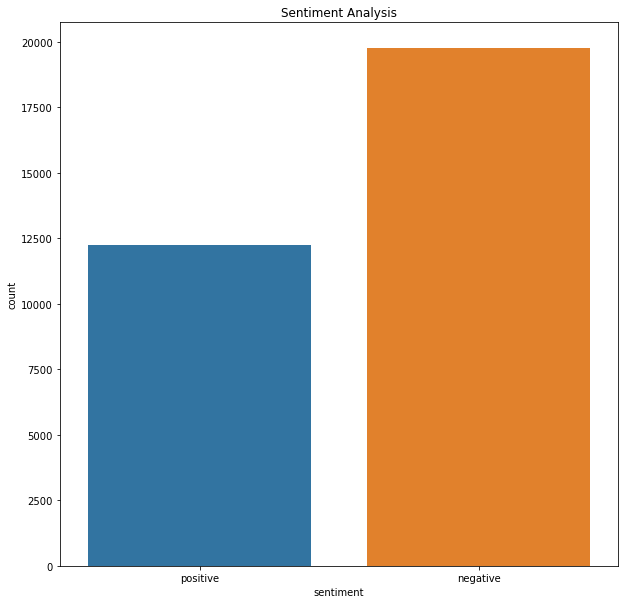

In [30]:
plt.figure(figsize=[10,10])
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
sns.countplot(x = 'sentiment', data = df)


In [31]:
#df.drop(labels=1,axis=0)

,text,sentiment,subjectivity,polarity
0,angelemotion yayyy new videos amazing people,positive,0.677273,0.368182
2,scylissynaptic way man like year olds,positive,0.000000,0.000000
3,look hellacious deskgood grief httpshorttocevd,negative,0.200000,-0.800000
4,modeltheany tee beefinwhat supposed leavin,positive,0.000000,0.000000
5,months,positive,0.000000,0.000000
...,...,...,...,...
31995,night like birds keeping awake,negative,0.000000,0.000000
31996,going suffolk tomorrow however amp planning pi...,positive,0.000000,0.000000
31997,really wanna play,positive,0.200000,0.200000
31998,davidarchie hey david wondering received lette...,positive,1.000000,0.600000


In [32]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [33]:
#converting sentiment into smaller groups since the dataset is highy unevenly distributed 
df['sentiment'] = df['sentiment'].apply(lambda x: x if x in ["fun", "surprise","happiness","enthusiasm", "love","relief"] else "negative")

In [34]:
df['sentiment'].unique()

array(['negative'], dtype=object)

In [35]:
df.head()

,text,sentiment,subjectivity,polarity
0,angelemotion yayyy new videos amazing people,negative,0.677273,0.368182
1,surgery wake,negative,0.000000,0.000000
2,scylissynaptic way man like year olds,negative,0.000000,0.000000
3,look hellacious deskgood grief httpshorttocevd,negative,0.200000,-0.800000
4,modeltheany tee beefinwhat supposed leavin,negative,0.000000,0.000000


In [36]:
#converting sentiment into smaller groups since the dataset is highy unevenly distributed 
df['sentiment'] = df['sentiment'].apply(lambda x: x if x in ["negative"] else "positive")

In [37]:
df['sentiment']

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
31995    negative
31996    negative
31997    negative
31998    negative
31999    negative
Name: sentiment, Length: 32000, dtype: object

In [38]:
df

,text,sentiment,subjectivity,polarity
0,angelemotion yayyy new videos amazing people,negative,0.677273,0.368182
1,surgery wake,negative,0.000000,0.000000
2,scylissynaptic way man like year olds,negative,0.000000,0.000000
3,look hellacious deskgood grief httpshorttocevd,negative,0.200000,-0.800000
4,modeltheany tee beefinwhat supposed leavin,negative,0.000000,0.000000
...,...,...,...,...
31995,night like birds keeping awake,negative,0.000000,0.000000
31996,going suffolk tomorrow however amp planning pi...,negative,0.000000,0.000000
31997,really wanna play,negative,0.200000,0.200000
31998,davidarchie hey david wondering received lette...,negative,1.000000,0.600000


In [39]:
from wordcloud import WordCloud
from textblob import TextBlob

In [40]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity

#create two new columns
df['subjectivity']=df['text'].apply(getSubjectivity)
df['polarity']=df['text'].apply(getpolarity)

#show the new datafraem with the new columns
df.head()

,text,sentiment,subjectivity,polarity
0,angelemotion yayyy new videos amazing people,negative,0.677273,0.368182
1,surgery wake,negative,0.000000,0.000000
2,scylissynaptic way man like year olds,negative,0.000000,0.000000
3,look hellacious deskgood grief httpshorttocevd,negative,0.200000,-0.800000
4,modeltheany tee beefinwhat supposed leavin,negative,0.000000,0.000000


## Compute the negative, neutral and positive analysis

In [41]:
def getAnalysis(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'
    
df['analysis']=df['polarity'].apply(getAnalysis)

#show dataFrame
df.head()

,text,sentiment,subjectivity,polarity,analysis
0,angelemotion yayyy new videos amazing people,negative,0.677273,0.368182,positive
1,surgery wake,negative,0.000000,0.000000,neutral
2,scylissynaptic way man like year olds,negative,0.000000,0.000000,neutral
3,look hellacious deskgood grief httpshorttocevd,negative,0.200000,-0.800000,negative
4,modeltheany tee beefinwhat supposed leavin,negative,0.000000,0.000000,neutral


In [42]:
# create two new dataframe all of the positive text
df_positive = df[df['analysis'] == 'positive']


# create two new dataframe all of the negative text
df_negative = df[df['analysis'] == 'negative']


# create two new dataframe all of the neutral text
df_neutral=df[df['analysis'] == 'neutral']

# count the number of positive, negative, neutral reviews.

In [43]:
tb_counts = df.analysis.value_counts()
tb_counts

positive    13964
neutral     11642
negative     6394
Name: analysis, dtype: int64

# Data Exploration

### Let's form a WordCloud

#### A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes

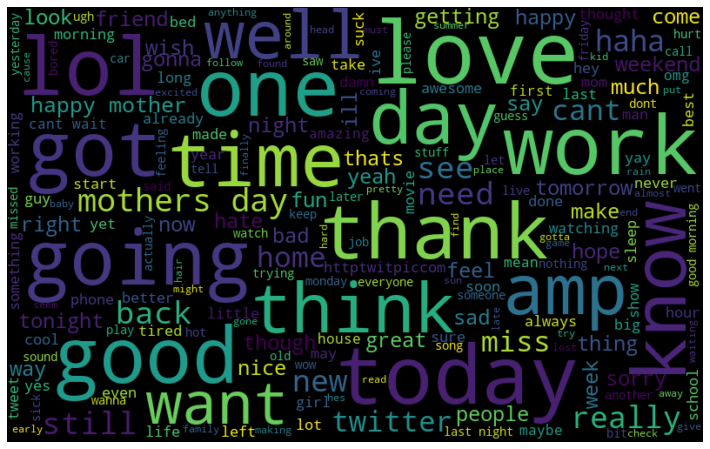

In [44]:
# Visualizing all tweets

all_words = " ".join(sent for sent in df['text'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Positive tweets

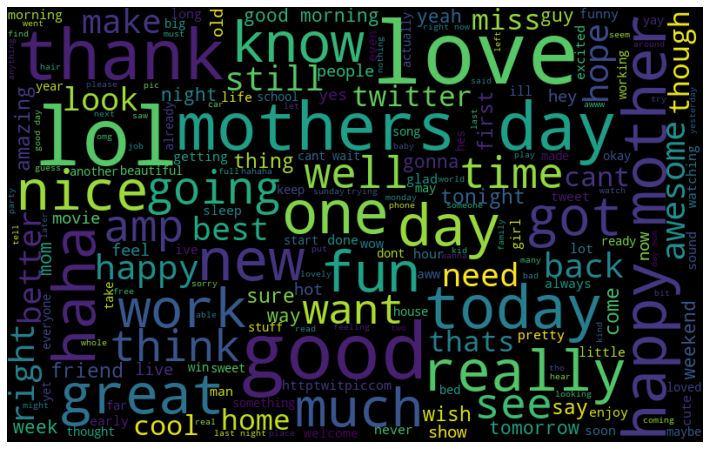

In [45]:
# Visualizing all positive tweets

all_pos_words = " ".join(sent for sent in df_positive['text'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_pos_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Negative tweets

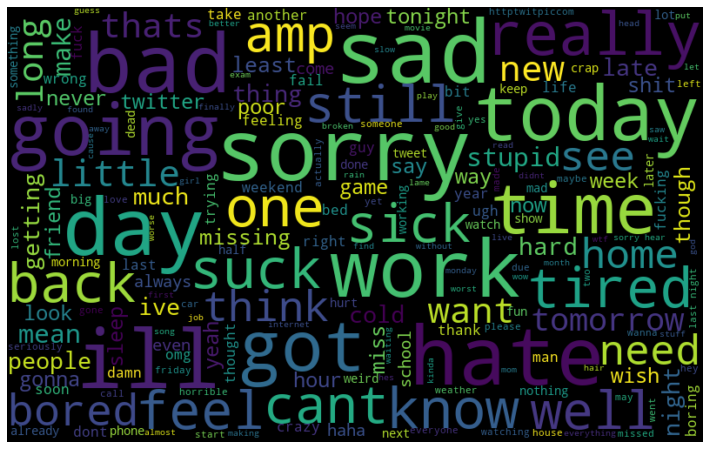

In [46]:

all_neg_words = " ".join(sent for sent in df_negative['text'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neg_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

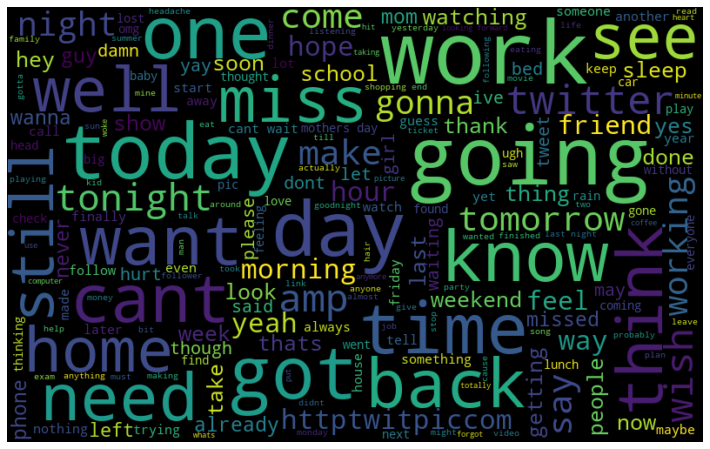

In [47]:
# Visualizing all neutral tweets

all_neu_words = " ".join(sent for sent in df_neutral['text'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_neu_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [48]:
# Get the percentage of positive tweets
print("Positive tweets",round((df_positive.shape[0]/df.shape[0])*100,1),"%")
# Get the percentage of negative tweets
print("Negative tweets",round((df_negative.shape[0]/df.shape[0])*100,1),"%")
# Get the percentage of neutral tweets
print("Neutral tweets",round((df_neutral.shape[0]/df.shape[0])*100,1),"%")


Positive tweets 43.6 %
Negative tweets 20.0 %
Neutral tweets 36.4 %


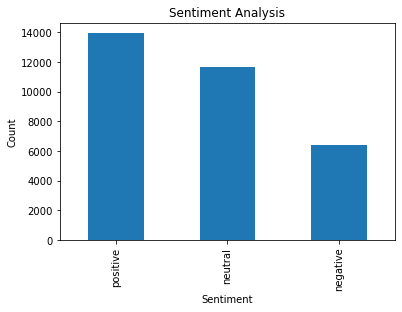

In [49]:
# show the value counts

df['analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
df['analysis'].value_counts().plot(kind='bar')
plt.show()


# Conclusion

### we can see that maximum percentage of positive tweets 43.6% , minimum percentage of negative tweets 20.0% and neutral tweets 36.4%.

In [69]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
# Removing neutral sentiments
train = train[train.sentiment != "neutral"]

In [71]:
from wordcloud import WordCloud,STOPWORDS

Positive words


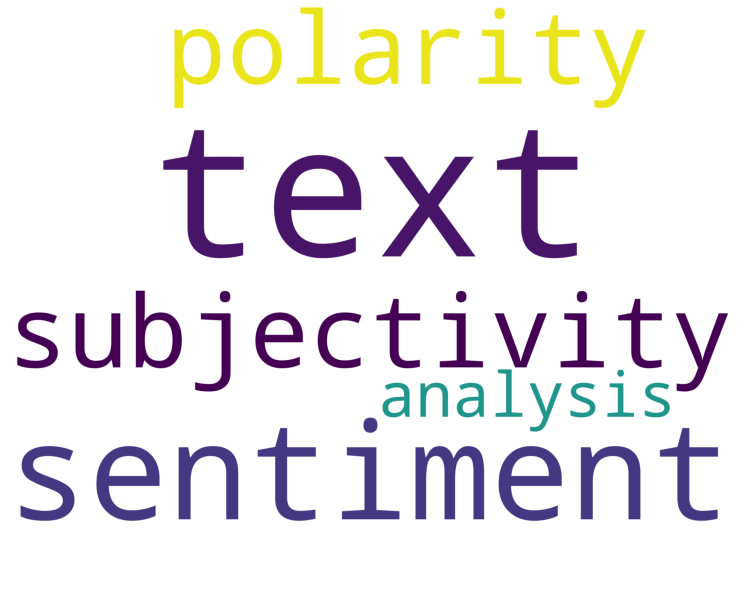

Negative words


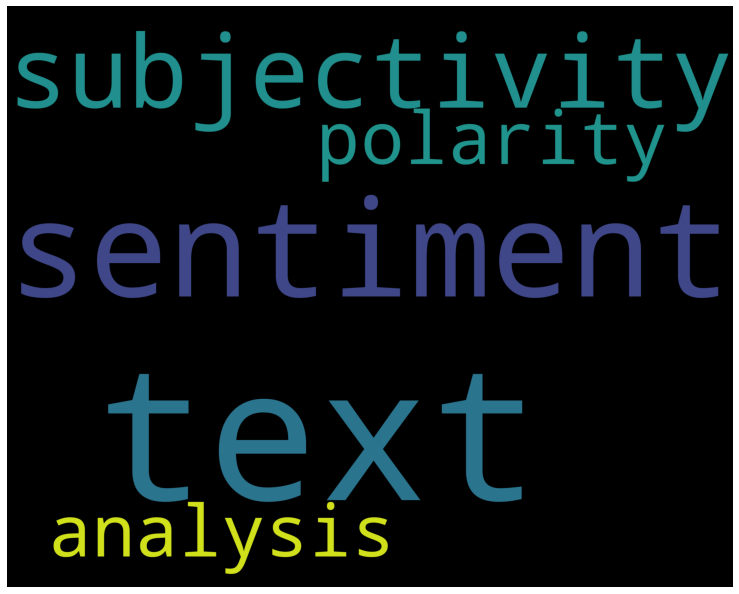

In [73]:
train_pos = train[ train['sentiment'] == 'positive']
train_pos = train_pos['text']
train_neg = train[ train['sentiment'] == 'negative']
train_neg = train_neg['text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(df)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [74]:
from subprocess import check_output

In [75]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.text.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.sentiment))

test_pos = test[ test['sentiment'] == 'Positive']
test_pos = test_pos['text']
test_neg = test[ test['sentiment'] == 'Negative']
test_neg = test_neg['text']

In [77]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [78]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [79]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Negative'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 'Positive'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))   

[Negative]: 0/0 
[Positive]: 0/0 
